In [1]:
# just pathing - ignore this
import os
while  not 'juxtorpus' in os.listdir():
    os.chdir('../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

'Working directory: /Users/hcha9747/workspace/juxtorpus'

# Australian Text Analytics Platform (ATAP)
The Australian Text Analytics Platform aims to provide a set of easy to use text analytics tools that are designed for the jupyter platform targetted at students, researchers with little coding experience.

# Corpus

A Corpus stores a collection of documents. It is usually the unit of data that we want to explore and analyse.

These can be:
1. journal articles
2. tweets
3. academic papers

Anything in the form of text.

## What you'll need:
- [x] a dataset in the form of .xlsx, .csv

In [2]:
from juxtorpus.corpus import CorpusBuilder, Corpus

path = 'notebooks/workshops/amazon_us_reviews_gift_cards.xlsx'
builder = CorpusBuilder(path)

In [3]:
builder.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     24371595  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1          US     42489718   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2          US       861463  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   

                         product_title product_category  star_rating  \
0        Amazon eGift Card - Celebrate        Gift Card            5   
1               Amazon.com eGift Cards        Gift Card            5   
2  Amazon.com Gift Card Balance Reload        Gift Card            5   

   helpful_votes  total_votes  vine  verified_purchase  \
0              0            0     0                  1   
1              0            0     0                  1   
2              0            0     0                  1   

                                     review_headline  \
0                                         Five Stars   
1  Gift card for the greatest selection of items ...   
2                                         Five Stars   

                                         review_body review_date  
0             Great birthday gift for a young adult.  2015-08-31  
1  It's an Amazon gift card and with over 9823983...  2015-08-31  
2                                               Good  2015-08-31

In [4]:
corpus = None
def set_corpus(c): 
    global corpus
    corpus = c
builder.set_callback(set_corpus)
builder.widget()

In [5]:
corpus

In [6]:
# for those who know python and pandas.
import pandas as pd
corpus = Corpus.from_dataframe(pd.read_excel(path), col_doc='review_body')
corpus.docs().iloc[:3]

0               Great birthday gift for a young adult.
1    It's an Amazon gift card and with over 9823983...
2                                                 Good
Name: document, dtype: object

## Basic Corpus Statistics

In [7]:
corpus.summary()

Corpus Type                                                         Corpus
Number of Documents                                                 149086
Number of Total Words                                              3685264
Size of Vocabulary                                                   31445
mean Words per Document                                                 24
min Words per Document                                                   0
max Words per Document                                                1744
metas                    marketplace, customer_id, review_id, product_i...

In [8]:
corpus.meta.summary()

marketplace                                        customer_id  \
dtype          object                                              int64   
sample             US                                           24371595   
top                US                                            9374792   
top_freq       149086                                                  7   
uniqs              US  24371595, 42489718, 861463, 25283295, 397970, ...   
num_uniqs           1                                             143181   
mean                                                     26282536.789631   
std                                                      15874673.170314   
min                                                              10637.0   
25%                                                           12889328.5   
50%                                                           24983021.5   
75%                                                           41393302.0   
max                                                           53096482.0   

                                                   review_id  \
dtype                                                 object   
sample                                        R27ZP1F1CD0C3Y   
top                                           R27ZP1F1CD0C3Y   
top_freq                                                   1   
uniqs      R27ZP1F1CD0C3Y, RJ7RSBCHUDNNE, R1HVYBSKLQJI5S,...   
num_uniqs                                             149086   
mean                                                           
std                                                            
min                                                            
25%                                                            
50%                                                            
75%                                                            
max                                                            

                                                  product_id  \
dtype                                                 object   
sample                                            B004LLIL5A   
top                                               B004LLIKVU   
top_freq                                               28879   
uniqs      B004LLIL5A, B004LLIKVU, B00IX1I3G6, B005ESMGV4...   
num_uniqs                                               1780   
mean                                                           
std                                                            
min                                                            
25%                                                            
50%                                                            
75%                                                            
max                                                            

                                              product_parent  \
dtype                                                  int64   
sample                                             346014806   
top                                                473048287   
top_freq                                               37108   
uniqs      346014806, 473048287, 926539283, 379368939, 32...   
num_uniqs                                               1197   
mean                                        540685102.051514   
std                                         266130816.706405   
min                                                1100879.0   
25%                                              361255549.0   
50%                                              473048287.0   
75%                                              775486538.0   
max                                              999274173.0   

                                               product_title product_category  \
dtype                                                 object           object   
sample                         Amazon eGift Card - Celebrate        Gift Card   
top        

In [9]:
corpus.meta

{'marketplace': <SeriesMeta [Id: marketplace dtype: object]>,
 'customer_id': <SeriesMeta [Id: customer_id dtype: int64]>,
 'review_id': <SeriesMeta [Id: review_id dtype: object]>,
 'product_id': <SeriesMeta [Id: product_id dtype: object]>,
 'product_parent': <SeriesMeta [Id: product_parent dtype: int64]>,
 'product_title': <SeriesMeta [Id: product_title dtype: object]>,
 'product_category': <SeriesMeta [Id: product_category dtype: object]>,
 'star_rating': <SeriesMeta [Id: star_rating dtype: int64]>,
 'helpful_votes': <SeriesMeta [Id: helpful_votes dtype: int64]>,
 'total_votes': <SeriesMeta [Id: total_votes dtype: int64]>,
 'vine': <SeriesMeta [Id: vine dtype: int64]>,
 'verified_purchase': <SeriesMeta [Id: verified_purchase dtype: int64]>,
 'review_headline': <SeriesMeta [Id: review_headline dtype: object]>,
 'review_date': <SeriesMeta [Id: review_date dtype: object]>}

## Off the shelf quick Corpus exploration

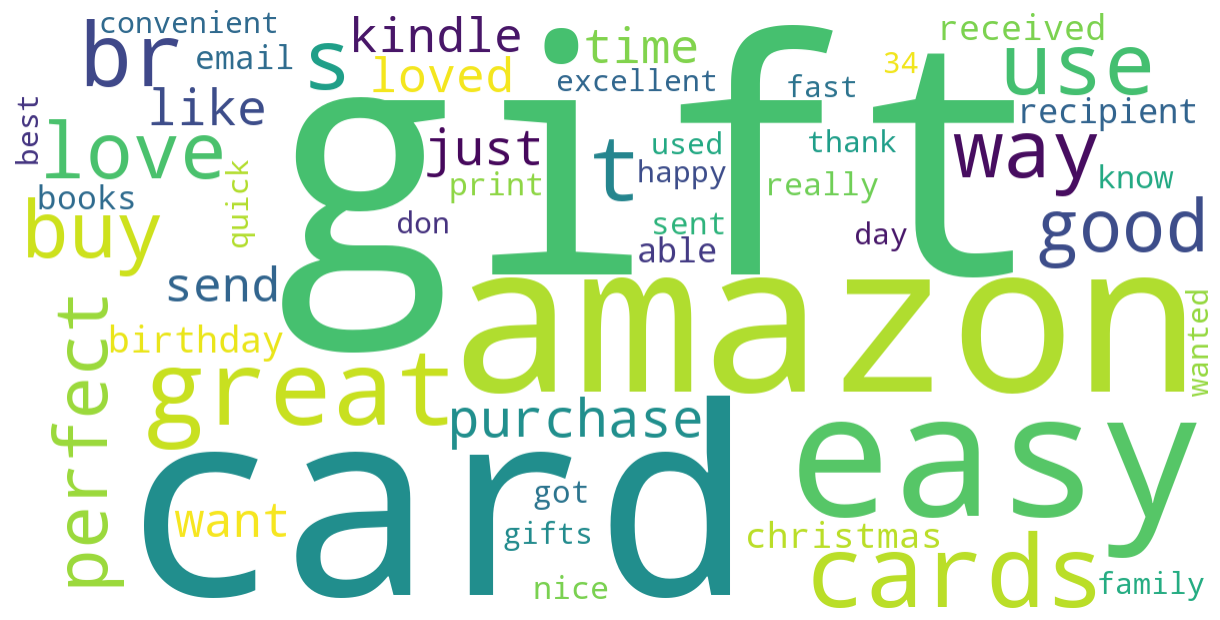

In [10]:
METRIC = 'tf'
# METRIC = 'tfidf'

TYPE = 'word'
# TYPE = 'hashtag'
# TYPE = 'mention'

corpus.viz.wordcloud(metric=METRIC, word_type=TYPE)

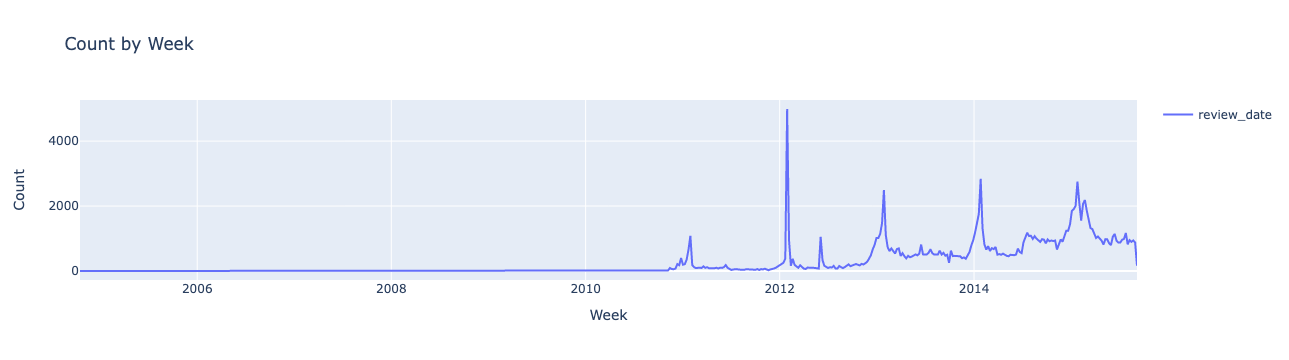

In [11]:
corpus.meta['review_date'].astype('datetime')
corpus.viz.timeline('review_date', freq='1w')

# Zooming In to January 2012 and January 2014

In [12]:
jan_2012 = corpus.slicer.filter_by_datetime(id_='review_date', start='22-Jan-2012', end='12-Feb-2012')
jan_2014 = corpus.slicer.filter_by_datetime(id_='review_date', start='22-Jan-2014', end='12-Feb-2014')

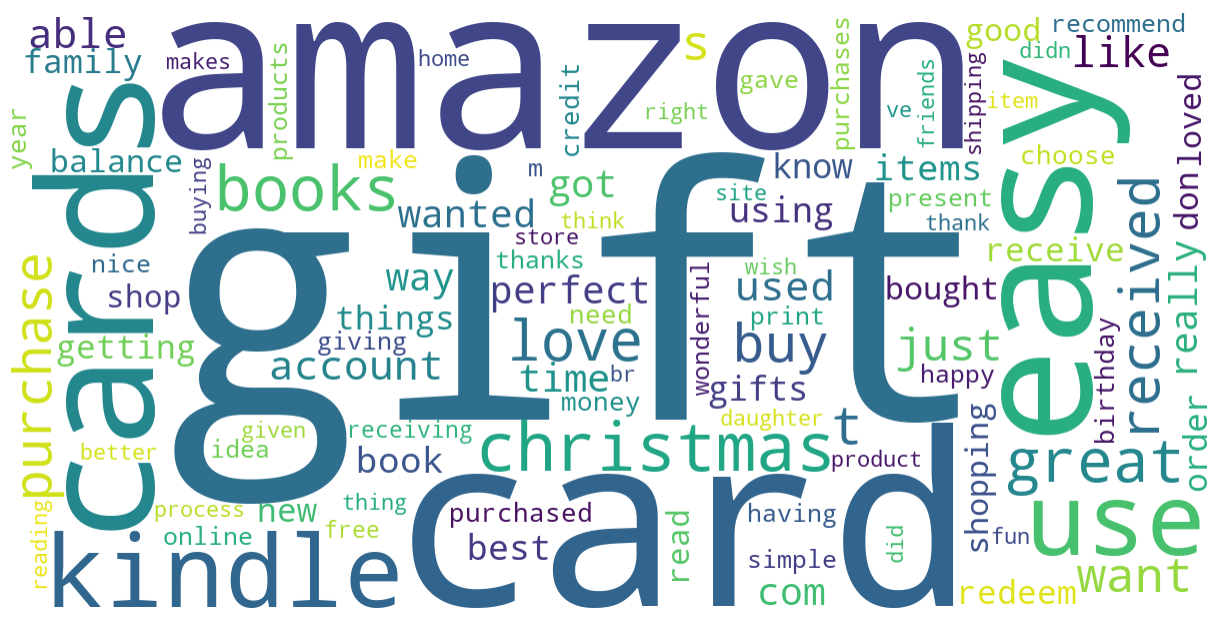

In [13]:
jan_2012.viz.wordcloud(metric=METRIC, word_type='word', max_words=100)

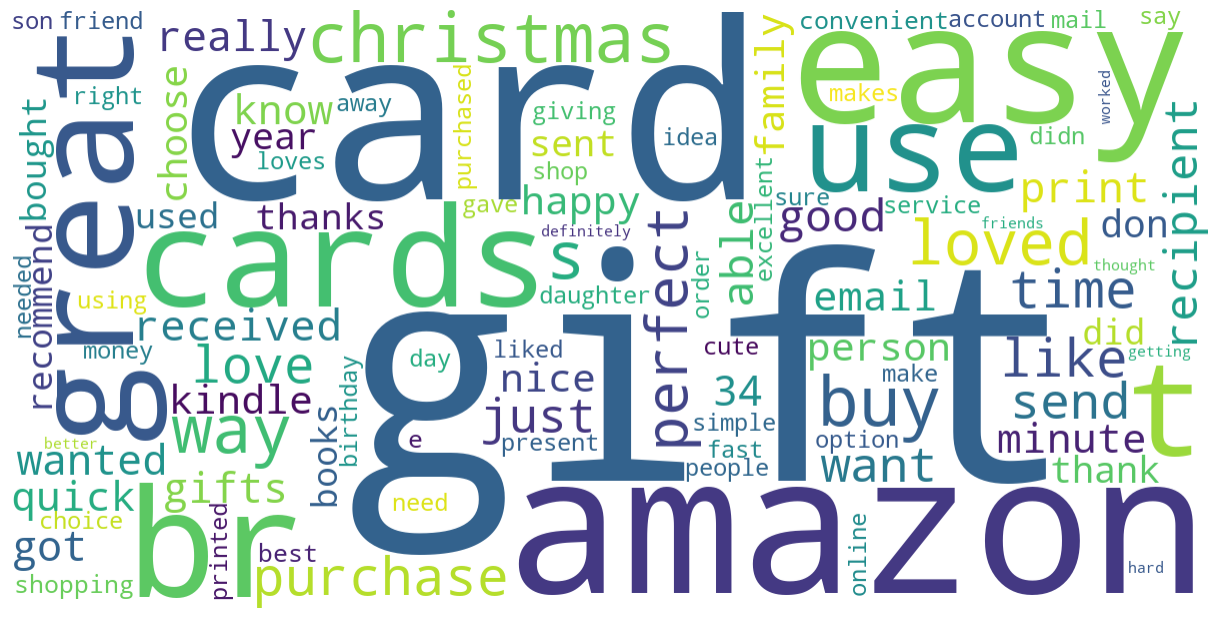

In [14]:
jan_2014.viz.wordcloud(metric=METRIC, word_type='word', max_words=100)

In [ ]:
from juxtorpus.viz.item_timeline import ItemTimeline

it = ItemTimeline.from_corpus(corpus, freq='1w')
it.widget()

## Document Term Matrix

In [16]:
corpus.dtm.total

3685264

In [17]:
corpus.dtm.vocab()

{'erase',
 'impersonal',
 'midst',
 'tires',
 'denominations',
 'ry',
 'eres',
 'television',
 'sincerly',
 'chewing',
 'throwing',
 'trusted',
 'leftover',
 'movies1',
 'yayee',
 'onine',
 'blurry',
 'suprise',
 'skinny',
 'procesar',
 'verynice',
 'pinky',
 'delirium',
 'recrive',
 'cookbooks',
 'aaammmaazzziiinnggg',
 'greating',
 '430',
 'hood',
 'stockings',
 'answers',
 'convent',
 'karmas',
 'ilike',
 'eli',
 'jajaj',
 'becayse',
 'atenci',
 'referida',
 'shading',
 'modal',
 'подарочная',
 'capecodmediaking',
 'costo',
 'stunk',
 'alboms',
 'apprepciate',
 'thre',
 'bag',
 'cristhmas',
 'clubs',
 'tommy',
 'multiple',
 'contrary',
 '170',
 'vector',
 'antivirus',
 'communicated',
 'heater',
 'moreover',
 'tone',
 'coincidental',
 'backdrop',
 'marquez',
 'tasteful',
 'o2',
 'serveral',
 'triplets',
 'legalese',
 'il',
 'wordsjust',
 'transasion',
 'missionaries',
 'wrappable',
 'relations',
 'shipmens',
 'flaw',
 'hallucinating',
 'coverlet',
 'dma',
 'namazon',
 'canvass',
 'c

## Back to a dataframe

In [18]:
corpus.to_dataframe().head(3)

document marketplace  customer_id  \
0             Great birthday gift for a young adult.          US     24371595   
1  It's an Amazon gift card and with over 9823983...          US     42489718   
2                                               Good          US       861463   

        review_id  product_id  product_parent  \
0  R27ZP1F1CD0C3Y  B004LLIL5A       346014806   
1   RJ7RSBCHUDNNE  B004LLIKVU       473048287   
2  R1HVYBSKLQJI5S  B00IX1I3G6       926539283   

                         product_title product_category  star_rating  \
0        Amazon eGift Card - Celebrate        Gift Card            5   
1               Amazon.com eGift Cards        Gift Card            5   
2  Amazon.com Gift Card Balance Reload        Gift Card            5   

   helpful_votes  total_votes  vine  verified_purchase  \
0              0            0     0                  1   
1              0            0     0                  1   
2              0            0     0                  1   

                                     review_headline review_date  
0                                         Five Stars  2015-08-31  
1  Gift card for the greatest selection of items ...  2015-08-31  
2                                         Five Stars  2015-08-31

In [19]:
corpus.dtm.to_dataframe().head(3)

0  00  000  0000  000s  0021  0062021494  0062030310  0071431861  00am  \
0  0   0    0     0     0     0           0           0           0     0   
1  0   0    0     0     0     0           0           0           0     0   
2  0   0    0     0     0     0           0           0           0     0   

   ...  удобно  узнавать  услугами  что  я  便捷  很好  很好用  迅速  馬  
0  ...       0         0         0    0  0   0   0    0   0  0  
1  ...       0         0         0    0  0   0   0    0   0  0  
2  ...       0         0         0    0  0   0   0    0   0  0  

[3 rows x 31445 columns]

# Why use Corpus?
1. **Consistent Conceptual Model**: This is unit of data used across the ATAP platform so you can expect a consistent standard and conceptual model across the existing and future ATAP tools.
2. **Consistent Uploader**: You only have to learn to use one uploader and one set of dataset standards to be in to use all the tools across our platform.
2. **Dataset Access**: It will later be connected to our partner LDACA's database of corpus.